Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

Описание данных
База данных об авиаперевозках:
Таблица airports — информация об аэропортах:

    airport_code — трёхбуквенный код аэропорта
    airport_name — название аэропорта
    city — город
    timezone — временная зона

Таблица aircrafts — информация об самолётах:

    aircraft_code — код модели самолёта
    model — модель самолёта
    range — количество самолётов

Таблица tickets — информация о билетах:

    ticket_no — уникальный номер билета
    passenger_id — персональный идентификатор пассажира
    passenger_name — имя и фамилия пассажира

Таблица flights — информация о рейсах:

    flight_id — уникальный идентификатор рейса
    departure_airport — аэропорт вылета
    departure_time — дата и время вылета
    arrival_airport — аэропорт прилёта
    arrival_time — дата и время прилёта
    aircraft_code – id самолёта

Таблица ticket_flights — стыковая таблица «рейсы-билеты»

    ticket_no — номер билета
    flight_id — идентификатор рейса

Таблица festivals — информация о фестивалях

    festival_id — уникальный номер фестиваля
    festival_date — дата проведения фестиваля
    festival_city — город проведения фестиваля
    festival_name — название фестиваля

# 1. Аналитика

In [66]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from scipy import stats
from scipy import stats as st

In [67]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')
query_last = pd.read_csv('/datasets/query_last.csv')

### query_1
данные о количестве рейсов для каждой модели самолетов в сентябре 2018 года

In [68]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [69]:
query_1.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [70]:
query_1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [71]:
query_1.duplicated().sum()

0

In [72]:
query_1.isna().sum()

model             0
flights_amount    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f411a9bbc50>]],
      dtype=object)

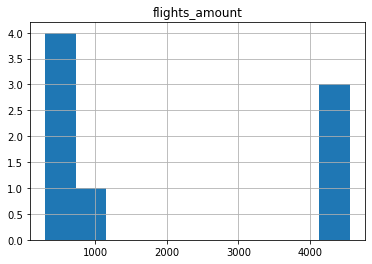

In [73]:
query_1.hist()

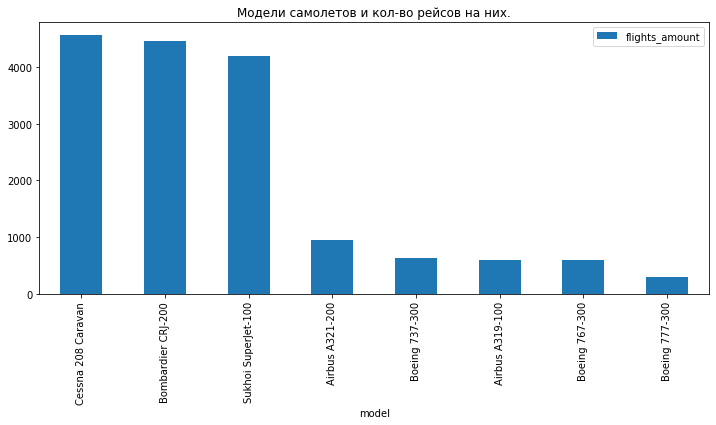

In [74]:
query_1.sort_values(by='flights_amount', ascending=False).plot(kind='bar', rot=90,x = 'model', y = 'flights_amount', figsize=(12,5), title = 'Модели самолетов и кол-во рейсов на них.')

### Выводы

    Всего 8 самолетов. 
    Медиана и среднее сильно отличаются дргу от друга.
    Наибольшее кол-во рейсов у моделей Bombardier CRj-200, Cessna 208 Caravan и Сухой Superjet-100.
    Пропуски и дубли отсутствуют.

### query_3
данные о среднем количестве рейсов, прибывающих в каждый из 101 города за день в сентябре 2018 года

In [75]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [76]:
query_3.head(10)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


In [77]:
query_3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


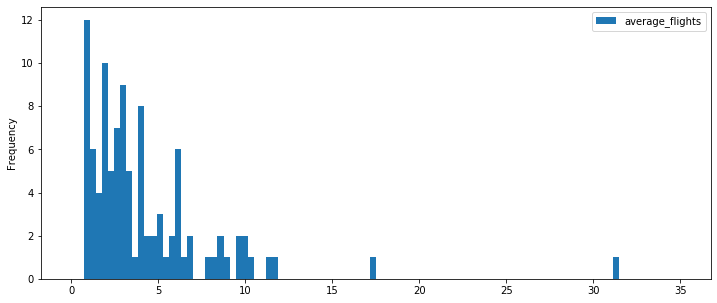

In [78]:
query_3.plot(y = 'average_flights', kind = 'hist', alpha = 1, bins = 100, range = [0,35], figsize=(12,5), title = '')

In [79]:
query_3.duplicated().sum()

0

In [80]:
query_3.isna().sum()

city               0
average_flights    0
dtype: int64

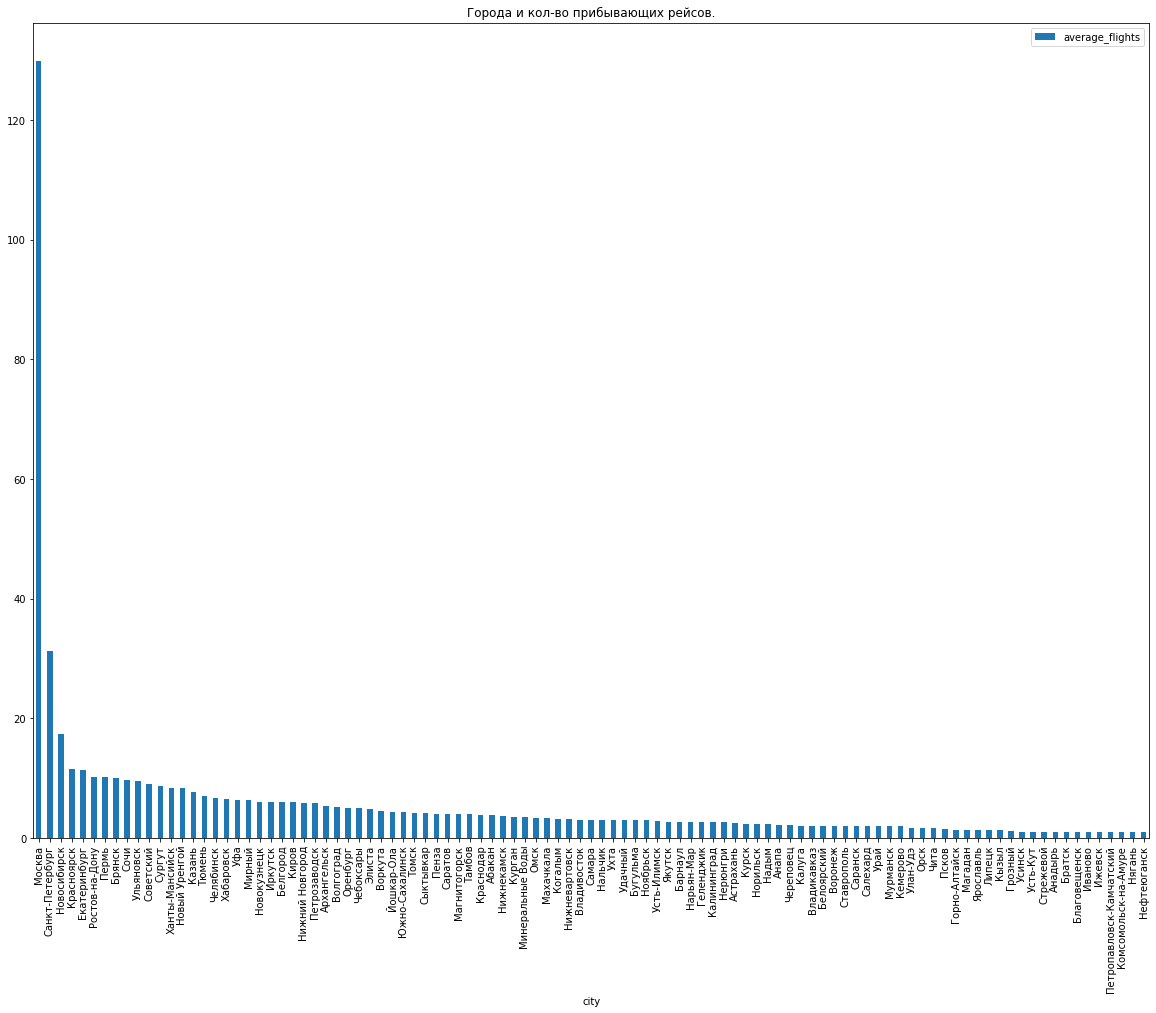

In [81]:
query_3.sort_values(by='average_flights', ascending=False).plot(kind='bar', rot=90,x = 'city', y = 'average_flights', figsize=(20,15), title = 'Города и кол-во прибывающих рейсов.')

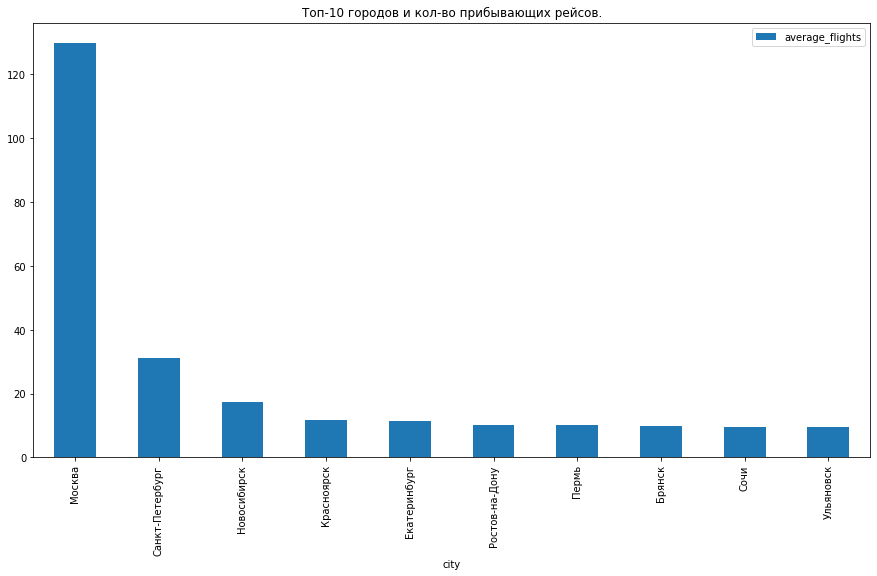

In [82]:
query_3.sort_values(by='average_flights', ascending=False).head(10).plot(kind='bar', rot=90,x = 'city', y = 'average_flights', figsize=(15,8), title = 'Топ-10 городов и кол-во прибывающих рейсов.')

### Выводы

    В датасете представлены данные о полетах в 101 город. 
    Количество полетов варьируется от 1 до 129
    Среднее число полетов - 5, медиана = 3, значит, распределение скошено вправо: есть города в которые летают чаще остальных, но их немного, и поэтому они не оказывают сильного влияния на среднее.
    Москва значительно опережает большинство городов по кол-ву рейсов.
    Санкт-Петербург находится на втором месте и в нем кол-во рейсов в 2 раза больше чем в других крупных городах, но в 4 раза меньше чем в Москве.   
    В остальных крупных городах сравнительно одинаковое кол-во рейсов.  
    Пропусков и дубликатов нету.

### query_last
данные о фестивалях и количестве проданных авиабилетов на той же неделе, когда проходил фестиваль

In [83]:
query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [84]:
query_last.head(10)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [85]:
query_last.duplicated().sum()

0

In [86]:
query_last.isna().sum()

week_number      0
ticket_amount    0
festival_week    7
festival_name    7
dtype: int64

### Выводы

    Имеются симметричные пропуски в столбцах festival_week и festival_name - на этих неделях фестивалей не было. 
    Столбец festival_week заполнен некорректно, он дублирует номер недели. 
    Столбец "festival_week по своему описанию должен быть булевого типа (1 - есть фестиваль, 0 - нет фестиваля), но почему-то имет тип float64. 

# 2. Проверка гипотезы

Будем использовать критерий Смирнова, так как гипотеза в задании сформулирован вопрос об однородности.

Сформулируем гипотезы:

    Н0: Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время
    Н1: Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время

Пороговое значение alpha = 0.05

In [87]:
#удалим ненужный столбец festival_week
query_last = query_last.drop(['festival_week'], axis=1)

In [88]:
#заполним пропуски в столбце festival_name меткой 'None'
query_last = query_last.fillna('None')

In [89]:
query_last.head()

,week_number,ticket_amount,festival_name
0,30,43568,Park Live
1,31,51034,Пикник Афиши
2,32,51675,None
3,33,51378,None
4,34,51492,None


In [90]:
alpha = 0.05

fest_only = query_last.query('festival_name != "None"')
fest_only = fest_only['ticket_amount']

no_fest = query_last.query('festival_name == "None"') 
no_fest = no_fest['ticket_amount']

###  критерий Смирнова

In [91]:
results = stats.ks_2samp(fest_only, no_fest)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.16666666666666685
Не получилось отвергнуть нулевую гипотезу


### Вывод: 
средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время. 

### критерий Манна-Уитни

Проверяем, равны ли распределения двух независимых выборок или нет

Требования:
    
    В каждой из выборок должно быть не менее 3 значений признака. Допускается, чтобы в одной выборке было два значения, но во второй тогда не менее пяти.
    В выборочных данных не должно быть совпадающих значений (все числа — разные) или таких совпадений должно быть очень мало (до 10).

In [92]:
results =  st.mannwhitneyu(fest_only, no_fest, alternative='two-sided')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.06824748837800128
Не получилось отвергнуть нулевую гипотезу


In [93]:
#кол-во билетов во время фестивалей, и в обычное время :
print(fest_only.mean())
print(no_fest.mean())

48662.666666666664
51530.857142857145


Средние значения количества билетов во время фестивалей и в обычные недели довольно сильно отличаются. При чем среднее количество купленных билетов в фестивальные недели ниже, чем среднее количество купленных билетов в обычное время.

#### а если без параметра: alternative='two-sided' то:

In [94]:
results =  st.mannwhitneyu(fest_only, no_fest)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.03412374418900064
Отвергаем нулевую гипотезу


### критерий Стьюдента

Проверяет, существенно ли отличаются средние значения двух независимых выборок.

Требования:

    Необходимо, чтобы исходные данные были независимы и одинаково распределены
    Необходимо, чтобы исходные данные имели нормальное распределение
    Необходимо соблюдение условия равенства дисперсий

In [95]:
results =  st.ttest_ind(fest_only, no_fest)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.09688869045922928
Не получилось отвергнуть нулевую гипотезу


## Новый Итоговый вывод:

Получается что данных мало, необходим дополнительный сбор данных.
Датасет с данными о фестивалях не подходит для исследования: он содержит информацию о фестивалях только в Москве, в то время как имеется информация о 101 населенном пункте, а также содержит всего 10 наблюдений, чего явно недостаточно для нормального исследования...

## Общий вывод:

    Были исследованы данные:
        query_1 - данные о количестве рейсов для каждой модели самолетов в сентябре 2018 года;
        query_3 - данные о среднем количестве рейсов, прибывающих в каждый из 101 города за день в сентябре 2018 года;
        query_last - данные о фестивалях и количестве проданных авиабилетов на той же неделе, когда проходил фестиваль.

    Исправлены ошибки, построены графики и сделаны выводы.

    Определен топ-10 городов по количеству рейсов. ТОП3: Москва, Санкт-Петербург и Новосибирск.

    Гипотезу о том, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время отвергнуть не удалось.